In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
input = pd.read_csv('zomato.csv')

In [3]:
input.shape

(51717, 17)

In [4]:
input.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [5]:
banglore=input[['name','location','rate','approx_cost(for two people)','rest_type','listed_in(type)']]

In [6]:
banglore['name'].nunique()

8792

In [7]:
banglore.columns

Index(['name', 'location', 'rate', 'approx_cost(for two people)', 'rest_type',
       'listed_in(type)'],
      dtype='object')

In [8]:
banglore.duplicated().sum()

21602

In [10]:
banglore.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,name,location,rate,approx_cost(for two people),rest_type,listed_in(type)
0,Jalsa,Banashankari,4.1/5,800,Casual Dining,Buffet
1,Spice Elephant,Banashankari,4.1/5,800,Casual Dining,Buffet
2,San Churro Cafe,Banashankari,3.8/5,800,"Cafe, Casual Dining",Buffet
3,Addhuri Udupi Bhojana,Banashankari,3.7/5,300,Quick Bites,Buffet
4,Grand Village,Basavanagudi,3.8/5,600,Casual Dining,Buffet
...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,Whitefield,3.6 /5,"1,500",Bar,Pubs and bars
51713,Vinod Bar And Restaurant,Whitefield,NaN,600,Bar,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,Whitefield,NaN,"2,000",Bar,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,"ITPL Main Road, Whitefield",4.3 /5,"2,500",Bar,Pubs and bars


In [11]:
banglore.rate.replace(('NEW','-'),np.nan,inplace =True)
banglore.rate = banglore.rate.astype('str')
banglore.rate = banglore.rate.apply(lambda x: x.replace('/5','').strip())
banglore.rate = banglore.rate.astype('float')

C:\Anaconda\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
banglore.isna().sum()

name                              0
location                         14
rate                           4921
approx_cost(for two people)     221
rest_type                       152
listed_in(type)                   0
dtype: int64

In [13]:
banglore.name.apply(lambda x: x.title())
banglore.rename(columns={'approx_cost(for two people)': 'average_cost', 'listed_in(type)': 'meal_type'}, inplace=True)
banglore.head()

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,name,location,rate,average_cost,rest_type,meal_type
0,Jalsa,Banashankari,4.1,800,Casual Dining,Buffet
1,Spice Elephant,Banashankari,4.1,800,Casual Dining,Buffet
2,San Churro Cafe,Banashankari,3.8,800,"Cafe, Casual Dining",Buffet
3,Addhuri Udupi Bhojana,Banashankari,3.7,300,Quick Bites,Buffet
4,Grand Village,Basavanagudi,3.8,600,Casual Dining,Buffet


In [14]:
# we will do the same for vote column
bins =[0,2,3,4,5]
labels =['low','moderate','high','exceptional']
banglore['rate_range'] = pd.cut(banglore.rate, bins=bins,labels=labels)
banglore['rate_range'].head()

<ipython-input-14-4ac5c65550ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banglore['rate_range'] = pd.cut(banglore.rate, bins=bins,labels=labels)


0    exceptional
1    exceptional
2           high
3           high
4           high
Name: rate_range, dtype: category
Categories (4, object): ['low' < 'moderate' < 'high' < 'exceptional']

In [15]:
banglore.head()

,name,location,rate,average_cost,rest_type,meal_type,rate_range
0,Jalsa,Banashankari,4.1,800,Casual Dining,Buffet,exceptional
1,Spice Elephant,Banashankari,4.1,800,Casual Dining,Buffet,exceptional
2,San Churro Cafe,Banashankari,3.8,800,"Cafe, Casual Dining",Buffet,high
3,Addhuri Udupi Bhojana,Banashankari,3.7,300,Quick Bites,Buffet,high
4,Grand Village,Basavanagudi,3.8,600,Casual Dining,Buffet,high


In [16]:
banglore.meal_type.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [17]:
for i in banglore.columns:
    print(i,"column has",banglore[i].isnull().sum(),"nulls")

name column has 0 nulls
location column has 14 nulls
rate column has 4921 nulls
average_cost column has 221 nulls
rest_type column has 152 nulls
meal_type column has 0 nulls
rate_range column has 4921 nulls


In [18]:
#filling null values in dataframe by 0
banglore.dropna(inplace=True)

<ipython-input-18-7d836ecb4522>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banglore.dropna(inplace=True)


In [19]:
for i in banglore.columns:
    print(i,"column has",banglore[i].isnull().sum(),"nulls")

name column has 0 nulls
location column has 0 nulls
rate column has 0 nulls
average_cost column has 0 nulls
rest_type column has 0 nulls
meal_type column has 0 nulls
rate_range column has 0 nulls


In [20]:
banglore.columns

Index(['name', 'location', 'rate', 'average_cost', 'rest_type', 'meal_type',
       'rate_range'],
      dtype='object')

In [21]:
banglore.drop('rest_type',axis=1,inplace=True)

types_dummy=pd.get_dummies(banglore['meal_type'],prefix='type')

types_dummy.head()

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,type_Buffet,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [22]:
banglore=pd.concat([banglore,types_dummy],axis=1)

banglore.drop('meal_type',axis=1,inplace=True)

banglore.drop_duplicates(inplace=True)

banglore.reset_index(inplace=True)

banglore.drop('index',axis=1,inplace=True)

banglore.head()

,name,location,rate,average_cost,rate_range,type_Buffet,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars
0,Jalsa,Banashankari,4.1,800,exceptional,1,0,0,0,0,0,0
1,Spice Elephant,Banashankari,4.1,800,exceptional,1,0,0,0,0,0,0
2,San Churro Cafe,Banashankari,3.8,800,high,1,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,Banashankari,3.7,300,high,1,0,0,0,0,0,0
4,Grand Village,Basavanagudi,3.8,600,high,1,0,0,0,0,0,0


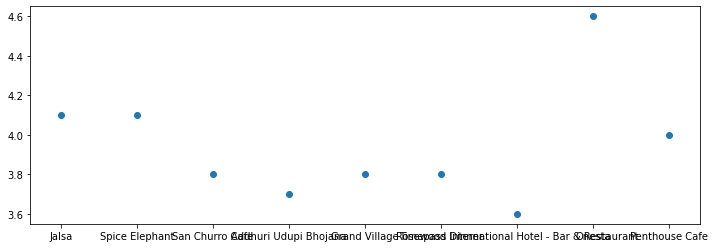

In [23]:
from matplotlib.pyplot import figure
figure(figsize=(12,4))
plt.scatter(banglore['name'].head(9),banglore['rate'].head(9))

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

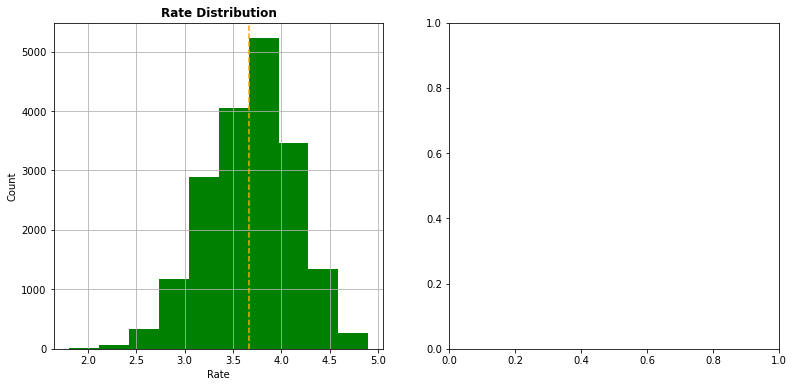

In [24]:
# plotting parameters
# set the color for all graphs
colors = ['pink' for i in range(banglore.location.nunique())]
colors[0] = 'blue'
# histogram for restaurants average_rate
plt.rcParams['figure.figsize'] = 13,6
plt.subplot(1,2,1)
banglore.rate.hist(color='green')
plt.axvline(x= banglore.rate.mean(),ls='--',color='orange')
plt.title('Rate Distribution',weight='bold')
plt.xlabel('Rate')
plt.ylabel('Count')

plt.subplot(1,2,2)
banglore.rate_range.value_counts().plot('bar',color=colors,grid=True)
plt.title('Rate range Distribution',weight='bold')
plt.xlabel('Rate range')
plt.ylabel('Number of restaurants')
plt.xticks(rotation=0)
plt.tight_layout();

In [25]:
banglore.columns

Index(['name', 'location', 'rate', 'average_cost', 'rate_range', 'type_Buffet',
       'type_Cafes', 'type_Delivery', 'type_Desserts', 'type_Dine-out',
       'type_Drinks & nightlife', 'type_Pubs and bars'],
      dtype='object')

In [26]:
banglore.average_cost = banglore.average_cost.apply(lambda x: int(x.replace(',','')))
# check for values
banglore.average_cost.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199, 1100, 1600,  230,  130, 1700, 1350, 2200, 1400, 2000, 1800,
       1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,   40, 1250,
       3500, 4000, 2400, 2600, 1450,   70, 3200,  240, 6000, 1050, 2300,
       4100,  120, 5000, 3700, 1650, 2700, 4500,   80], dtype=int64)

In [27]:
banglore_clus=banglore.drop(['name','location','rate_range'],1)

#creating duplicates for standardization purpose and comparing results
banglore_clus_std=banglore_clus
banglore_clus_copy=banglore_clus

banglore_clus.head()

,rate,average_cost,type_Buffet,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars
0,4.1,800,1,0,0,0,0,0,0
1,4.1,800,1,0,0,0,0,0,0
2,3.8,800,1,0,0,0,0,0,0
3,3.7,300,1,0,0,0,0,0,0
4,3.8,600,1,0,0,0,0,0,0


In [28]:
from sklearn.cluster import KMeans
#1 without standardizing input features
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(banglore_clus)

KMeans(n_clusters=3, random_state=0)

In [29]:
labels=kmeans.labels_

banglore_clus['clusters'] = labels

banglore_clus.head()

,rate,average_cost,type_Buffet,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars,clusters
0,4.1,800,1,0,0,0,0,0,0,0
1,4.1,800,1,0,0,0,0,0,0,0
2,3.8,800,1,0,0,0,0,0,0,0
3,3.7,300,1,0,0,0,0,0,0,2
4,3.8,600,1,0,0,0,0,0,0,0


In [30]:
clmns=banglore.columns.values.tolist()

clmns.extend(['clusters'])

clmns

['name',
 'location',
 'rate',
 'average_cost',
 'rate_range',
 'type_Buffet',
 'type_Cafes',
 'type_Delivery',
 'type_Desserts',
 'type_Dine-out',
 'type_Drinks & nightlife',
 'type_Pubs and bars',
 'clusters']

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 6.79999999999999, 'price_level')

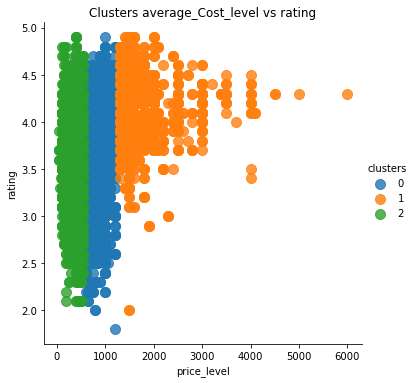

In [31]:
import seaborn as sns
sns.lmplot('average_cost', 'rate', data=banglore_clus, fit_reg=False, hue="clusters",  scatter_kws={"marker": "D", "s": 100})
plt.title('Clusters average_Cost_level vs rating')
plt.ylabel('rating')
plt.xlabel('price_level')